In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
dark_horse = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

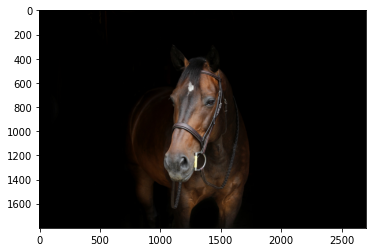

In [3]:
plt.imshow(show_horse)

In [4]:
hist_blue_brick = cv2.calcHist(images=[blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256])

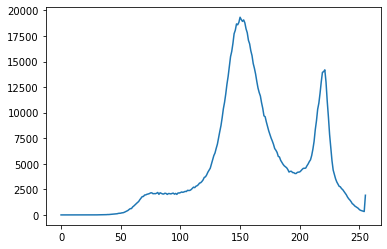

In [5]:
plt.plot(hist_blue_brick)

In [6]:
hist_blue_horse = cv2.calcHist(images=[dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256])

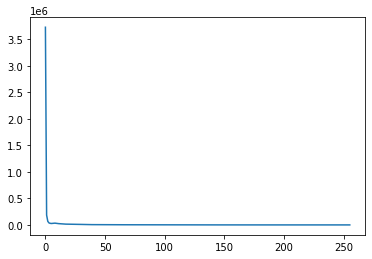

In [7]:
plt.plot(hist_blue_horse)

In [8]:
from importlib import reload
plt=reload(plt)

Text(0.5, 1.0, 'Histogram for brick')

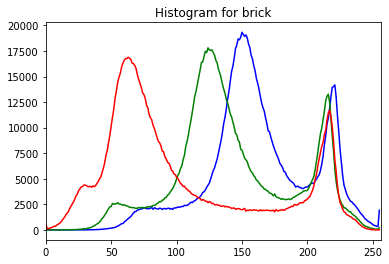

In [9]:
color = ('b','g','r')
for i, col in enumerate(color):
    his = cv2.calcHist([blue_bricks],[i],None,[256],[0,256])
    plt.plot(his,color=col)
    plt.xlim([0,256])

plt.title("Histogram for brick")


Text(0.5, 1.0, 'Histogram for horse')

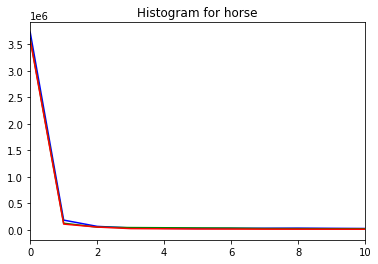

In [10]:
color = ('b','g','r')
for i, col in enumerate(color):
    his = cv2.calcHist([dark_horse],[i],None,[256],[0,256])
    plt.plot(his,color=col)
    plt.xlim([0,10])

plt.title("Histogram for horse")

## Calculate with mask

In [11]:
rainbow = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

In [12]:
rainbow.shape

(550, 413, 3)

### Create the mask

In [13]:
mask = np.zeros(rainbow.shape[:2], np.uint8)

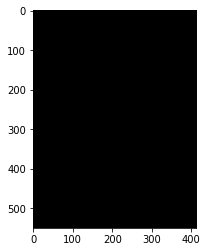

In [15]:
plt.imshow(mask,cmap='gray')

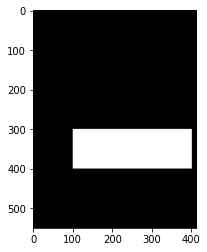

In [18]:
mask[300:400, 100:400] = 255
plt.imshow(mask, 'gray')

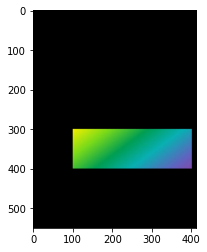

In [20]:
rainbow_mask = cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask)
plt.imshow(rainbow_mask)

Text(0.5, 1.0, 'Histogram rainbow with mask')

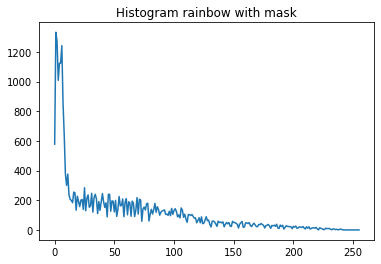

In [22]:
hist_mask_rainbow_red = cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0,256])
plt.plot(hist_mask_rainbow_red)
plt.title('Histogram rainbow with mask')

Text(0.5, 1.0, 'Histogram rainbow with no mask')

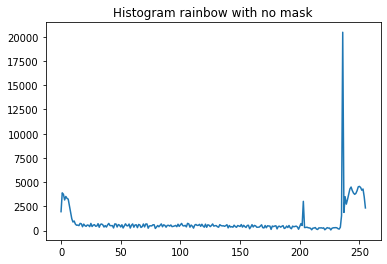

In [23]:
hist_rainbow_red = cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_rainbow_red)
plt.title('Histogram rainbow with no mask')

## Equalization

In [24]:
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [27]:
img = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\gorilla.jpg',0)

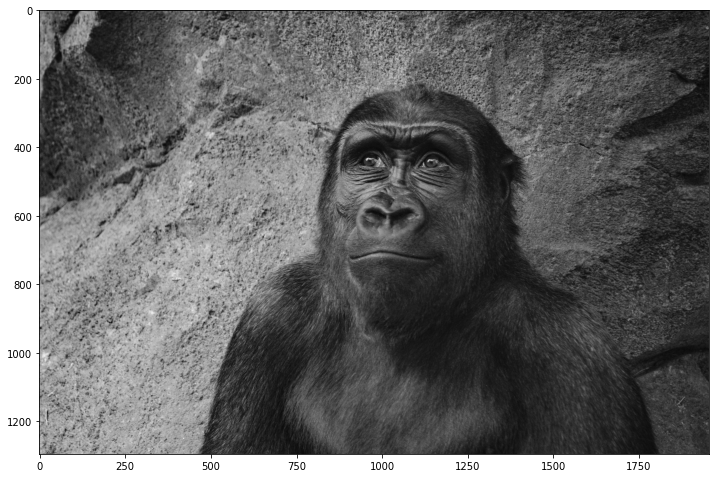

In [28]:
display_img(img, 'gray')

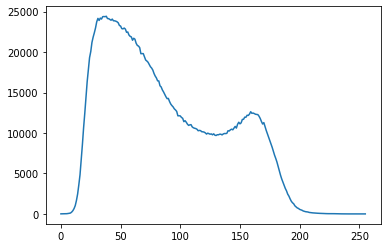

In [29]:
his1 = cv2.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(his1)

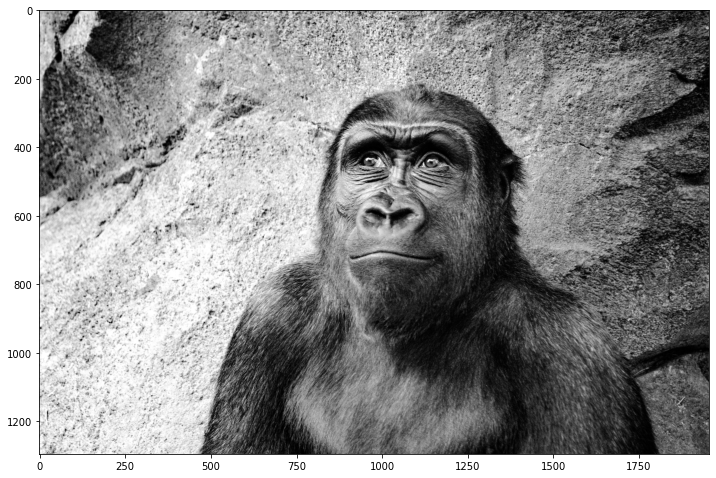

In [30]:
eq_img = cv2.equalizeHist(img)
display_img(eq_img,'gray')

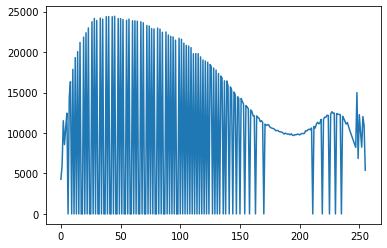

In [31]:
his2 = cv2.calcHist([eq_img], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(his2)

In [32]:
color_img = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\gorilla.jpg')
show_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

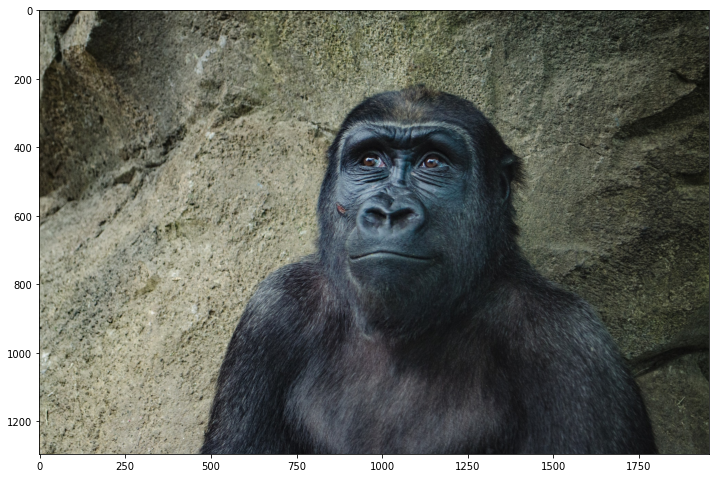

In [33]:
display_img(show_img)

In [34]:
hsv_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)

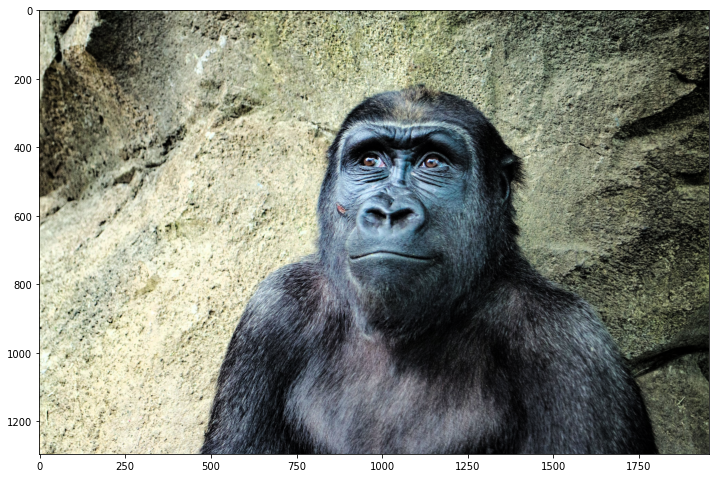

In [35]:
hsv_img[:,:,2] = cv2.equalizeHist(hsv_img[:,:,2])
show_hsv_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
display_img(show_hsv_img)